# Week 2 - Importing Data

In [1]:
# imports
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_232"; OpenJDK Runtime Environment (build 1.8.0_232-8u232-b09-0ubuntu1~19.04.1-b09); OpenJDK 64-Bit Server VM (build 25.232-b09, mixed mode)
  Starting server from /home/megan/Projects/h2oclass/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpacucw4il
  JVM stdout: /tmp/tmpacucw4il/h2o_megan_started_from_python.out
  JVM stderr: /tmp/tmpacucw4il/h2o_megan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_megan_h7oogv
H2O cluster total nodes:,1
H2O cluster free memory:,1.520 Gb
H2O cluster total cores:,3
H2O cluster allowed cores:,3
H2O cluster status:,"accepting new members, healthy"


In [3]:
# create our x of 1001
x = [z*0.01 for z in range(1001)]

In [4]:
print(x[:5])
print(x[996:])

[0.0, 0.01, 0.02, 0.03, 0.04]
[9.96, 9.97, 9.98, 9.99, 10.0]


In [5]:
# create y as the sine of x, with some noise
y = np.sin(x)
y += np.random.normal(0, 0.1, len(x))

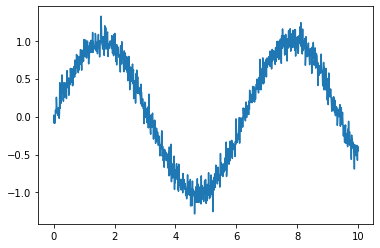

In [6]:
# view our data
plt.plot(x, y)
plt.show()

In [7]:
# create a dataframe
sine_wave = pd.DataFrame({
    'a':x,
    'b':y
})

In [8]:
# convert the pandas dataframe to an H2O frame
sine_wave_h2o = h2o.H2OFrame(
    sine_wave
)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
# view a summary of the H2O frame
sine_wave_h2o.summary()

,a,b
type,real,real
mins,0.0,-1.283143861317382
mean,4.999999999999934,0.175136572532225
maxs,10.0,1.322688852460212
sigma,2.891081112663593,0.6753314450861596
zeros,1,0
missing,0,0
0,0.0,-0.07905426489402469
1,0.01,0.018131174945459728
2,0.02,-0.006897379047226929


In [10]:
# if look in H2O Flow, the above frame wasn't named nicely - let's name it
sine_wave_h2o = h2o.H2OFrame(
    sine_wave,
    destination_frame = 'sine_wave'
)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
# convert an H2O frame to a pandas dataframe
sine_wave_h2o.as_data_frame()

,a,b
0,0.00,-0.079054
1,0.01,0.018131
2,0.02,-0.006897
3,0.03,-0.088714
4,0.04,-0.086533
...,...,...
996,9.96,-0.379995
997,9.97,-0.492576
998,9.98,-0.575166
999,9.99,-0.391441
